In [266]:
import pandas as pd
import numpy as np

In [267]:
df1 = pd.read_csv("./src/Audible_Catlog.csv")
df2 = pd.read_csv("./src/Audible_Catlog_Advanced_Features.csv")

In [268]:
df1.head()

,Book Name,Author,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0


In [269]:
df2.head()

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."


In [270]:
merged_df = pd.merge(df1, df2[['Book Name', 'Description', 'Listening Time', 'Ranks and Genre']],
                     on='Book Name', how='left')

In [271]:
### Remove HTML tags from Description column

import pandas as pd
import re

def clean_description(text):
    if pd.isnull(text):
        return ""
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove newline and extra spaces
    text = text.replace('\n', ' ').strip()
    text = re.sub(r'\s+', ' ', text)  # replace multiple spaces with one
    return text

merged_df['Description'] = merged_df['Description'].apply(clean_description)

In [272]:
merged_df[['Book Name', 'Description', 'Ranks and Genre']].head()

,Book Name,Description,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,"Over the past three years, Jay Shetty has beco...",",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Brought to you by Penguin.,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,"In this generation-defining self-help guide, a...",",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,Brought to you by Penguin.,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,"Stop going through life, Start growing through...",",#6 in Audible Audiobooks & Originals (See Top..."


In [273]:
merged_df.columns

Index(['Book Name', 'Author', 'Rating', 'Number of Reviews', 'Price',
       'Description', 'Listening Time', 'Ranks and Genre'],
      dtype='object')

In [274]:
merged_df["Price"].max()

np.float64(18290.0)

In [275]:
# ## seperet the listing time in hour and minute 

import numpy as np
import pandas as pd

# Step 1: Replace "-1" string with NaN
merged_df['Listening Time'] = merged_df['Listening Time'].replace("-1", np.nan)

# Step 2: Function to convert minutes to "X hours and Y minutes"
def minutes_to_time_str(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{int(hours)} hours and {int(mins)} minutes" if mins else f"{int(hours)} hours"

# Step 3: Function to impute missing time based on price and return time string
def impute_time_based_on_price(row):
    if pd.notna(row['Listening Time']):
        return row['Listening Time']  # already filled
    
    price = row['Price']
    if price < 300.0:
        return minutes_to_time_str(110)  # 1 hour 50 minutes
    elif 300.0 <= price <= 500.0:
        return minutes_to_time_str(150)  # 2 hours 30 minutes
    elif 500.0 < price <= 1000.0:
        return minutes_to_time_str(320)  # 5 hours 20 minutes
    elif 1000.0 < price <= 18290.0:
        return minutes_to_time_str(610)  # 10 hours 10 minutes

# Step 4: Apply imputation function
merged_df['Listening Time'] = merged_df.apply(impute_time_based_on_price, axis=1)

In [276]:
### I drop the rows whose contains hindi sentence and character

import re

def contains_hindi(row):
    pattern = r'[\u0900-\u097F]'  # Unicode range for Devanagari characters
    return any(bool(re.search(pattern, str(cell))) for cell in row)

# Drop rows where any column contains Hindi
merged_df = merged_df[~merged_df.apply(contains_hindi, axis=1)].reset_index(drop=True)

In [277]:
merged_df.drop_duplicates(inplace=True)

In [278]:
merged_df["Number of Reviews"].value_counts()

Number of Reviews
1.0       82
2.0       59
3.0       58
4.0       41
5.0       31
          ..
5804.0     1
1549.0     1
1739.0     1
1123.0     1
797.0      1
Name: count, Length: 1744, dtype: int64

In [279]:
merged_df.drop(merged_df[merged_df["Number of Reviews"]<35.0].index, inplace=True)

In [280]:
merged_df["Price"].fillna(merged_df["Price"].median(), inplace=True)

C:\Users\Hardik_Viradiya\AppData\Local\Temp\ipykernel_11024\1482423907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["Price"].fillna(merged_df["Price"].median(), inplace=True)


In [281]:
merged_df.Price.isnull().sum()   ### Thier is no null values in Price column.

np.int64(0)

In [282]:
import numpy as np

merged_df["Rating"] = merged_df["Rating"].replace(-1, np.nan)

In [283]:
merged_df['Rating'].fillna(merged_df['Rating'].mean(), inplace=True)  # Mean imputation

C:\Users\Hardik_Viradiya\AppData\Local\Temp\ipykernel_11024\1199534926.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Rating'].fillna(merged_df['Rating'].mean(), inplace=True)  # Mean imputation


In [284]:
merged_df = merged_df.drop(merged_df[merged_df["Rating"] < 2].index)

In [285]:
merged_df = merged_df.drop(merged_df[merged_df["Price"] < 100].index)

In [286]:
merged_df

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0,"Stop going through life, Start growing through...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."
...,...,...,...,...,...,...,...,...
6789,"For Women Only, Revised and Updated Edition: W...",Shaunti Feldhahn,4.7,1402.0,586.0,,5 hours and 20 minutes,NaN
6790,Conscious Coaching: The Art and Science of Bui...,Brett Bartholomew,4.8,472.0,668.0,,5 hours and 20 minutes,NaN
6791,Lost and Found: Finding Hope in the Detours of...,Sarah Jakes,4.7,797.0,653.0,,5 hours and 20 minutes,NaN
6794,Forbidden Flowers: More Women's Sexual Fantasies,Nancy Friday,3.8,86.0,836.0,,5 hours and 20 minutes,NaN


In [287]:
merged_df["Price"].value_counts()

Price
668.0     410
836.0     242
888.0     176
501.0     158
703.0     156
         ... 
3416.0      1
866.0       1
952.0       1
349.0       1
199.0       1
Name: count, Length: 354, dtype: int64

In [288]:
merged_df['Description'].isnull().sum()


np.int64(0)

In [289]:
merged_df["Description"].value_counts()

Description
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1684
Sorry, we just need to make sure you're not a robot. For best results, please make sure your browser is accepting cookies.                                                              

In [290]:
(merged_df[merged_df['Description'] == '']).to_csv("kk.csv")

In [291]:
merged_df['Description'] = merged_df['Description'].fillna('').replace(r'^\s*$', np.nan, regex=True)

# Fill missing descriptions with a synthetic one using the 'Book Name' column
merged_df['Description'].fillna(merged_df['Book Name'] + ' - No description available.', inplace=True)

# Display a sample of the updated descriptions
merged_df[['Book Name', 'Description']].head(10)

C:\Users\Hardik_Viradiya\AppData\Local\Temp\ipykernel_11024\2136898808.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Description'].fillna(merged_df['Book Name'] + ' - No description available.', inplace=True)


,Book Name,Description
0,Think Like a Monk: The Secret of How to Harnes...,"Over the past three years, Jay Shetty has beco..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Brought to you by Penguin.
2,The Subtle Art of Not Giving a F*ck: A Counter...,"In this generation-defining self-help guide, a..."
3,Atomic Habits: An Easy and Proven Way to Build...,Brought to you by Penguin.
4,Life's Amazing Secrets: How to Find Balance an...,"Stop going through life, Start growing through..."
6,Sapiens,Fire gave us power. Farming made us hungry for...
7,Sapiens,New York Times Best Seller
8,The Intelligent Investor Rev Ed.,The Classic Text Annotated to Update Graham's ...
9,Rich Dad Poor Dad: What the Rich Teach Their K...,Rich Dad Poor Dad will….
10,The 5AM Club: Own Your Morning. Elevate Your L...,Legendary leadership and elite performance exp...


In [292]:
merged_df['hours'] = merged_df['Listening Time'].str.extract(r'(\d+)\s*hours?')[0].fillna(0).astype(int)
merged_df['minutes'] = merged_df['Listening Time'].str.extract(r'(\d+)\s*minutes?')[0].fillna(0).astype(int)

In [293]:
merged_df

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre,hours,minutes
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top...",10,54
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top...",3,23
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top...",5,17
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top...",5,35
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0,"Stop going through life, Start growing through...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top...",6,25
...,...,...,...,...,...,...,...,...,...,...
6789,"For Women Only, Revised and Updated Edition: W...",Shaunti Feldhahn,4.7,1402.0,586.0,"For Women Only, Revised and Updated Edition: W...",5 hours and 20 minutes,NaN,5,20
6790,Conscious Coaching: The Art and Science of Bui...,Brett Bartholomew,4.8,472.0,668.0,Conscious Coaching: The Art and Science of Bui...,5 hours and 20 minutes,NaN,5,20
6791,Lost and Found: Finding Hope in the Detours of...,Sarah Jakes,4.7,797.0,653.0,Lost and Found: Finding Hope in the Detours of...,5 hours and 20 minutes,NaN,5,20
6794,Forbidden Flowers: More Women's Sexual Fantasies,Nancy Friday,3.8,86.0,836.0,Forbidden Flowers: More Women's Sexual Fantasi...,5 hours and 20 minutes,NaN,5,20


In [294]:
merged_df.drop(columns=["Listening Time"], axis=1)

,Book Name,Author,Rating,Number of Reviews,Price,Description,Ranks and Genre,hours,minutes
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0,"Over the past three years, Jay Shetty has beco...",",#1 in Audible Audiobooks & Originals (See Top...",10,54
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0,Brought to you by Penguin.,",#2 in Audible Audiobooks & Originals (See Top...",3,23
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0,"In this generation-defining self-help guide, a...",",#3 in Audible Audiobooks & Originals (See Top...",5,17
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0,Brought to you by Penguin.,",#5 in Audible Audiobooks & Originals (See Top...",5,35
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0,"Stop going through life, Start growing through...",",#6 in Audible Audiobooks & Originals (See Top...",6,25
...,...,...,...,...,...,...,...,...,...
6789,"For Women Only, Revised and Updated Edition: W...",Shaunti Feldhahn,4.7,1402.0,586.0,"For Women Only, Revised and Updated Edition: W...",NaN,5,20
6790,Conscious Coaching: The Art and Science of Bui...,Brett Bartholomew,4.8,472.0,668.0,Conscious Coaching: The Art and Science of Bui...,NaN,5,20
6791,Lost and Found: Finding Hope in the Detours of...,Sarah Jakes,4.7,797.0,653.0,Lost and Found: Finding Hope in the Detours of...,NaN,5,20
6794,Forbidden Flowers: More Women's Sexual Fantasies,Nancy Friday,3.8,86.0,836.0,Forbidden Flowers: More Women's Sexual Fantasi...,NaN,5,20


In [295]:
(merged_df["Ranks and Genre"] == "-1").sum()

np.int64(1398)

In [296]:
merged_df.drop(columns=["Listening Time"], axis=1, inplace=True)

In [297]:
merged_df.head(5)

,Book Name,Author,Rating,Number of Reviews,Price,Description,Ranks and Genre,hours,minutes
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0,"Over the past three years, Jay Shetty has beco...",",#1 in Audible Audiobooks & Originals (See Top...",10,54
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0,Brought to you by Penguin.,",#2 in Audible Audiobooks & Originals (See Top...",3,23
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0,"In this generation-defining self-help guide, a...",",#3 in Audible Audiobooks & Originals (See Top...",5,17
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0,Brought to you by Penguin.,",#5 in Audible Audiobooks & Originals (See Top...",5,35
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0,"Stop going through life, Start growing through...",",#6 in Audible Audiobooks & Originals (See Top...",6,25


In [298]:
merged_df

,Book Name,Author,Rating,Number of Reviews,Price,Description,Ranks and Genre,hours,minutes
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0,"Over the past three years, Jay Shetty has beco...",",#1 in Audible Audiobooks & Originals (See Top...",10,54
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0,Brought to you by Penguin.,",#2 in Audible Audiobooks & Originals (See Top...",3,23
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0,"In this generation-defining self-help guide, a...",",#3 in Audible Audiobooks & Originals (See Top...",5,17
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0,Brought to you by Penguin.,",#5 in Audible Audiobooks & Originals (See Top...",5,35
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0,"Stop going through life, Start growing through...",",#6 in Audible Audiobooks & Originals (See Top...",6,25
...,...,...,...,...,...,...,...,...,...
6789,"For Women Only, Revised and Updated Edition: W...",Shaunti Feldhahn,4.7,1402.0,586.0,"For Women Only, Revised and Updated Edition: W...",NaN,5,20
6790,Conscious Coaching: The Art and Science of Bui...,Brett Bartholomew,4.8,472.0,668.0,Conscious Coaching: The Art and Science of Bui...,NaN,5,20
6791,Lost and Found: Finding Hope in the Detours of...,Sarah Jakes,4.7,797.0,653.0,Lost and Found: Finding Hope in the Detours of...,NaN,5,20
6794,Forbidden Flowers: More Women's Sexual Fantasies,Nancy Friday,3.8,86.0,836.0,Forbidden Flowers: More Women's Sexual Fantasi...,NaN,5,20


### ==============================================================================================


In [299]:
merged_df['Ranks and Genre List'] = merged_df['Ranks and Genre'].apply(
    lambda x: [item.strip() for item in x.split(',') if item.strip()] if isinstance(x, str) else []
)

In [300]:
import re

def extract_genres(rank_list):
    genres = []
    for rank in rank_list:
        match = re.search(r'in (.+?)(?: \(.*?\)|$)', rank)
        if match:
            genres.append(match.group(1).strip())
    return genres

# Apply it to the list column
merged_df['Genres Extracted'] = merged_df['Ranks and Genre List'].apply(extract_genres)

In [301]:
merged_df.drop(columns=["Ranks and Genre List"], axis = 1, inplace= True)

In [302]:
merged_df.drop(columns=["Ranks and Genre"], axis = 1, inplace= True)

In [303]:
merged_df

,Book Name,Author,Rating,Number of Reviews,Price,Description,hours,minutes,Genres Extracted
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0,"Over the past three years, Jay Shetty has beco...",10,54,"[Audible Audiobooks & Originals, Personal Succ..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0,Brought to you by Penguin.,3,23,"[Audible Audiobooks & Originals, Meditation, S..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0,"In this generation-defining self-help guide, a...",5,17,"[Audible Audiobooks & Originals, Personal Succ..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0,Brought to you by Penguin.,5,35,"[Audible Audiobooks & Originals, Psychology, S..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0,"Stop going through life, Start growing through...",6,25,"[Audible Audiobooks & Originals, Literary Essa..."
...,...,...,...,...,...,...,...,...,...
6789,"For Women Only, Revised and Updated Edition: W...",Shaunti Feldhahn,4.7,1402.0,586.0,"For Women Only, Revised and Updated Edition: W...",5,20,[]
6790,Conscious Coaching: The Art and Science of Bui...,Brett Bartholomew,4.8,472.0,668.0,Conscious Coaching: The Art and Science of Bui...,5,20,[]
6791,Lost and Found: Finding Hope in the Detours of...,Sarah Jakes,4.7,797.0,653.0,Lost and Found: Finding Hope in the Detours of...,5,20,[]
6794,Forbidden Flowers: More Women's Sexual Fantasies,Nancy Friday,3.8,86.0,836.0,Forbidden Flowers: More Women's Sexual Fantasi...,5,20,[]


In [304]:
merged_df['Genres Extracted'] = merged_df['Genres Extracted'].apply(
    lambda x: [genre.strip() for genre in x if genre.strip() != "Audible Audiobooks & Originals"]
)

In [305]:
merged_df.to_excel("rough1.xlsx")

In [306]:
df= pd.read_excel("rough1.xlsx")

In [307]:
import pandas as pd
import ast  # to safely convert string list into Python list

# Load the Excel file
df = pd.read_excel("rough1.xlsx")

# Convert string representation of list into actual list
df['Genres Extracted'] = df['Genres Extracted'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Expand into multiple columns
df[['Genres Extracted', 'Column2', 'Column3']] = pd.DataFrame(
    df['Genres Extracted'].apply(lambda x: x + [None]*(3-len(x)) if len(x) < 3 else x[:3]).tolist(),
    index=df.index
)

In [308]:
import pandas as pd

genre_cols = ['Genres Extracted', 'Column2', 'Column3']

all_genres = pd.concat([df[col] for col in genre_cols])

unique_genres = all_genres.dropna().str.strip().unique()

unique_genres = sorted(unique_genres)

genre_df = pd.DataFrame(unique_genres, columns=['Unique Genres'])
genre_df.to_excel("unique_genres.xlsx", index=False)


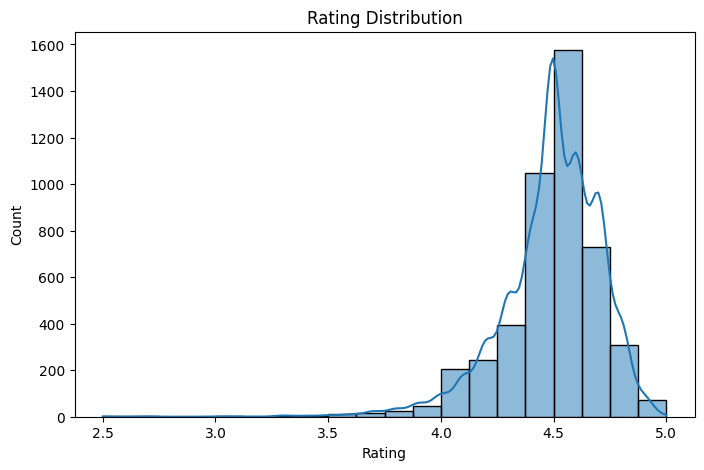

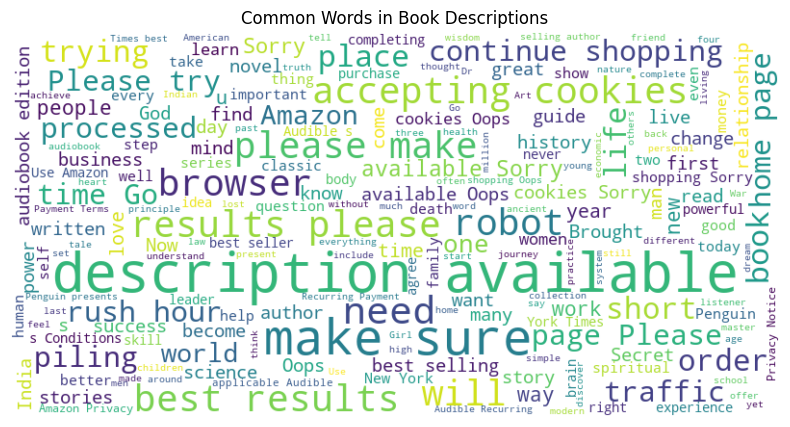

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_df["Rating"], bins=20, kde=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Word cloud for book descriptions
text = " ".join(merged_df["Description"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Book Descriptions")
plt.show()

In [310]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Get the words and their frequencies
word_freq = wordcloud.words_

# Convert to DataFrame for easy viewing and analysis
word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])

# Sort by frequency
word_freq_df = word_freq_df.sort_values(by="Frequency", ascending=False)

# Show top 10
print(word_freq_df)

                      Word  Frequency
0    description available   1.000000
1                make sure   0.799881
2                     need   0.451900
3                    robot   0.399644
4                  browser   0.399644
..                     ...        ...
195               economic   0.025534
196              principle   0.025534
197                   past   0.024941
198                   last   0.024941
199                 health   0.024941

[200 rows x 2 columns]


In [311]:
word_freq_df.to_excel("wordcloud_frequencies.xlsx", index=False)

In [312]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill missing descriptions with empty strings
merged_df["Description"] = merged_df["Description"].fillna("")

# Convert descriptions to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
tfidf_matrix = vectorizer.fit_transform(merged_df["Description"])

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

TF-IDF Matrix Shape: (4692, 5000)


In [315]:
import pandas as pd

# --- Step 1: Load the genre list from CSV ---
genre_df = pd.read_excel("unique_genres.xlsx")
genre_list = genre_df['Unique Genres'].dropna().unique().tolist()
genre_list_lower = [genre.lower() for genre in genre_list]

# --- Step 3: Define the function to fill missing genres ---
def fill_missing_genres(row):
    if not row['Genres Extracted']:  # If the list is empty
        desc = row['Description'].lower() if pd.notnull(row['Description']) else ''
        matched_genres = [genre_list[i] for i, genre in enumerate(genre_list_lower) if genre in desc]
        return matched_genres
    return row['Genres Extracted']

# --- Step 4: Apply the function to the DataFrame ---
merged_df['Genres Extracted'] = merged_df.apply(fill_missing_genres, axis=1)

# --- View sample result ---
print(merged_df[['Description', 'Genres Extracted']])


                                            Description  \
0     Over the past three years, Jay Shetty has beco...   
1                            Brought to you by Penguin.   
2     In this generation-defining self-help guide, a...   
3                            Brought to you by Penguin.   
4     Stop going through life, Start growing through...   
...                                                 ...   
6789  For Women Only, Revised and Updated Edition: W...   
6790  Conscious Coaching: The Art and Science of Bui...   
6791  Lost and Found: Finding Hope in the Detours of...   
6794  Forbidden Flowers: More Women's Sexual Fantasi...   
6807     The Hot Flash Club - No description available.   

                                       Genres Extracted  
0     [Personal Success, Stress Management, Society ...  
1           [Meditation, Self-Esteem, Personal Success]  
2     [Personal Success, Personal Development & Self...  
3     [Psychology, Stress Management, Personal Success]  
4

In [316]:
import pandas as pd
import numpy as np
import re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

# --- Load genre list and preprocess ---
genre_df = pd.read_excel("unique_genres.xlsx")
genre_list = genre_df['Unique Genres'].dropna().unique().tolist()
genre_list_lower = [g.lower() for g in genre_list]
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# --- Preprocessing function ---
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# --- Main genre filler ---
def fuzzy_fill_genres(row):
    if not row['Genres Extracted']:
        desc = row['Description']
        if pd.isnull(desc) or not desc.strip():
            return []
        desc_clean = clean_text(desc)

        matched_genres = []
        for genre, genre_raw in zip(genre_list_lower, genre_list):
            score = fuzz.partial_ratio(genre, desc_clean)
            if score >= 80:
                matched_genres.append(genre_raw)
        
        return list(set(matched_genres))
    return row['Genres Extracted']

# --- Apply to DataFrame ---
merged_df['Genres Extracted'] = merged_df.apply(fuzzy_fill_genres, axis=1)


c:\Users\Hardik_Viradiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hardik_Viradiya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [317]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import PorterStemmer

# --- Download resources ---
nltk.download('stopwords')

# --- Load genre list and preprocess ---
genre_df = pd.read_excel("unique_genres.xlsx")
genre_list = genre_df['Unique Genres'].dropna().unique().tolist()

# --- Combine genre keywords for better vectorization ---
# Create a "genre theme dictionary" - just use the genre name itself as its theme
genre_themes = {genre: genre.lower().replace("-", " ") for genre in genre_list}

# --- Load your main DataFrame ---
# Assume `merged_df` is already loaded and contains 'Description' and 'Genres Extracted'

# --- Preprocess text function ---
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    if pd.isnull(text): return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# --- Clean genre descriptions ---
genre_corpus = [clean_text(text) for text in genre_themes.values()]
genre_names = list(genre_themes.keys())

# --- Clean descriptions in the main dataframe ---
merged_df['cleaned_description'] = merged_df['Description'].apply(clean_text)

# --- Create TF-IDF matrix ---
vectorizer = TfidfVectorizer()
genre_vectors = vectorizer.fit_transform(genre_corpus)

# --- Function to fill missing genres using cosine similarity ---
def fill_genres_with_similarity(row, top_n=3, similarity_threshold=0.1):
    if row['Genres Extracted']:
        return row['Genres Extracted']  # Already filled

    desc = row['cleaned_description']
    if not desc.strip():
        return []

    desc_vector = vectorizer.transform([desc])
    similarity_scores = cosine_similarity(desc_vector, genre_vectors).flatten()

    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    top_genres = [
        genre_names[i]
        for i in top_indices
        if similarity_scores[i] >= similarity_threshold
    ]

    return list(set(top_genres))

# --- Apply to DataFrame ---
merged_df['Genres Extracted'] = merged_df.apply(fill_genres_with_similarity, axis=1)

# --- Optional: Remove helper column ---
merged_df.drop(columns=['cleaned_description'], inplace=True)

# --- Check remaining ---
remaining = merged_df[merged_df['Genres Extracted'].apply(lambda x: len(x) == 0)]
print(f"Remaining rows with empty genres: {len(remaining)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hardik_Viradiya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Remaining rows with empty genres: 440


In [318]:
merged_df["Genres Extracted"].value_counts()

Genres Extracted
[Cooking, Plays]                                                                                             673
[]                                                                                                           440
[Short Stories, Time Management, Higher & Continuing Education]                                              400
[Art]                                                                                                         97
[Economics Books, Biology Books, Music Books]                                                                 88
                                                                                                            ... 
[Adventurers, Biographies of Authors, Travel Writing & Commentary]                                             1
[Ancient & Classical Roman History, Rome, Textbooks & Study Guides]                                            1
[Marketing, Business Motivation & Self-Improvement, Leadership]                

In [319]:
# --- Get most frequent genres ---
from collections import Counter

# Flatten and count all genres used so far
genre_counter = Counter([genre for sublist in merged_df['Genres Extracted'] if isinstance(sublist, list) for genre in sublist])
most_common_genres = [genre for genre, _ in genre_counter.most_common(5)]

# --- Check and fill remaining with fallback ---
def fallback_genre_fill(row):
    if row['Genres Extracted']:
        return row['Genres Extracted']
    
    desc = row['Description'].lower() if pd.notnull(row['Description']) else ''
    fallback_genres = []

    # If a common genre word appears in the title or description, use it
    for genre in genre_list:
        if genre.lower() in desc:
            fallback_genres.append(genre)

    # If still empty, use most common genres
    if not fallback_genres:
        fallback_genres = most_common_genres

    return list(set(fallback_genres))

# --- Apply fallback to empty rows ---
merged_df['Genres Extracted'] = merged_df.apply(fallback_genre_fill, axis=1)

# --- Final Check ---
remaining_empty = merged_df[merged_df['Genres Extracted'].apply(lambda x: len(x) == 0)]
print(f"Remaining rows still empty: {len(remaining_empty)}")

Remaining rows still empty: 0


In [320]:
merged_df.to_excel("complete_preprocessing.xlsx")

In [321]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
df = pd.read_excel("complete_preprocessing.xlsx")
df.dropna(subset=['Description'], inplace=True)

In [323]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['Description'])

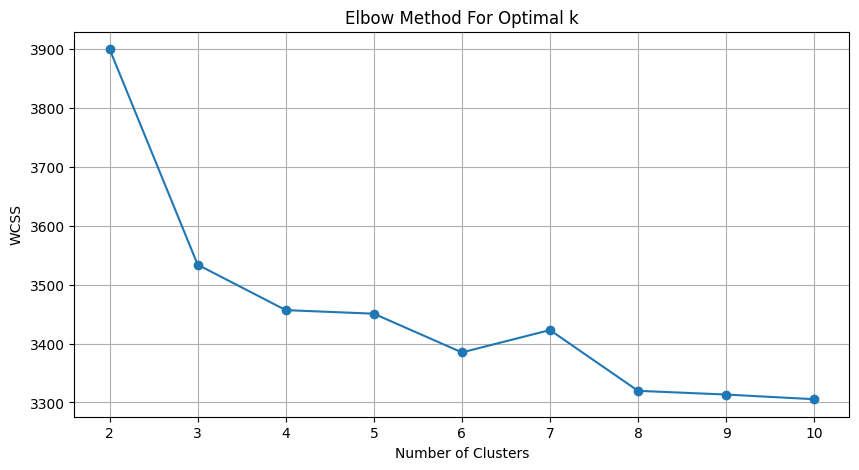

In [324]:
# Choosing the optimal number of clusters using Elbow Method (optional but good to visualize)
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(10,5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [325]:
# Based on elbow, choose optimal k
optimal_k = 5  # You can change this based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

In [326]:
# Compute cosine similarity matrix
cos_sim = cosine_similarity(tfidf_matrix)

def get_recommendations(book_index, top_n=5):
    sim_scores = list(enumerate(cos_sim[book_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    book_indices = [i[0] for i in sim_scores]
    return df[['Book Name', 'Author', 'Genres Extracted']].iloc[book_indices]

# Example usage
get_recommendations(book_index=0)

,Book Name,Author,Genres Extracted
3209,"The Classic Tales Podcast, Season Two",Charles Dickens,"['Classic Fiction', 'Classic Literature', 'Fic..."
1699,"The Classic Tales Podcast, Season Five",Agatha Christie,"['Caribbean & Latin American Literature', 'Eng..."
3826,LikeWar: The Weaponization of Social Media,P. W. Singer,['Social Media']
1187,The Facebook Effect: The Inside Story of the C...,David Kirkpatrick,"['Social Media', 'Technology & Society', 'E-Co..."
3181,The World as I See It,Neil Berger (introduction),['Words']


In [327]:
def get_cluster_recommendations(book_index, top_n=5):
    book_cluster = df.loc[book_index, 'Cluster']
    cluster_books = df[df['Cluster'] == book_cluster]
    cluster_books = cluster_books.drop(book_index, errors='ignore')
    return cluster_books[['Book Name', 'Author', 'Genres Extracted']].head(top_n)

# Example usage
get_cluster_recommendations(book_index=0)

,Book Name,Author,Genres Extracted
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,"['Meditation', 'Self-Esteem', 'Personal Success']"
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"['Personal Success', 'Personal Development & S..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,"['Psychology', 'Stress Management', 'Personal ..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,"['Literary Essays', 'Essays', 'Spiritualism']"
5,Sapiens,Yuval Noah Harari,"['Anthropology', 'History of Civilization', 'A..."


In [329]:
def evaluate_model(model_func):
    precision_list = []
    recall_list = []

    for idx in test_idx[:100]:  # limiting for speed
        actual_genres = df.loc[idx, 'Genres Extracted']
        
        # Skip if genres are empty
        if not isinstance(actual_genres, list) or len(actual_genres) == 0:
            continue
        actual_genres = set(actual_genres)

        try:
            recs = model_func(idx, top_n=5)
            if recs.empty:
                continue

            rec_genres = set()
            for genres in recs['Genres Extracted']:
                if isinstance(genres, list):
                    rec_genres.update(genres)
                elif isinstance(genres, str):
                    try:
                        rec_genres.update(eval(genres))
                    except:
                        continue

            if not rec_genres:
                continue

            true_positive = actual_genres.intersection(rec_genres)
            precision = len(true_positive) / len(rec_genres)
            recall = len(true_positive) / len(actual_genres)
            
            precision_list.append(precision)
            recall_list.append(recall)
        
        except Exception as e:
            continue

    return np.mean(precision_list), np.mean(recall_list)

In [330]:
def hybrid_recommendations(book_index, top_n=5):
    cluster_recs = get_cluster_recommendations(book_index, top_n=10)
    content_recs = get_recommendations(book_index, top_n=10)
    
    # Combine & rank based on cosine similarity
    combined = pd.concat([cluster_recs, content_recs]).drop_duplicates().reset_index(drop=True)
    if combined.empty:
        return combined
    combined['sim_score'] = combined['Book Name'].apply(
        lambda x: cosine_similarity(
            tfidf.transform([df[df['Book Name'] == x]['Description'].values[0]]),
            tfidf_matrix[book_index]
        )[0][0] if not df[df['Book Name'] == x].empty else 0
    )
    return combined.sort_values(by='sim_score', ascending=False).head(top_n)

# Example usage
hybrid_recommendations(0)

,Book Name,Author,Genres Extracted,sim_score
10,"The Classic Tales Podcast, Season Two",Charles Dickens,"['Classic Fiction', 'Classic Literature', 'Fic...",0.223320
11,"The Classic Tales Podcast, Season Five",Agatha Christie,"['Caribbean & Latin American Literature', 'Eng...",0.203564
12,LikeWar: The Weaponization of Social Media,P. W. Singer,['Social Media'],0.201230
13,The Facebook Effect: The Inside Story of the C...,David Kirkpatrick,"['Social Media', 'Technology & Society', 'E-Co...",0.158703
14,The World as I See It,Neil Berger (introduction),['Words'],0.145838
